<a href="https://colab.research.google.com/github/murrashovaa/Structures-and-algorithmes/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 4. Методы поиска.
## Выполнила студентка группы БСТ2105 Мурашова В.А.

Реализовать методы поиска в соответствии с заданием. Организовать генерацию начального набора случайных данных. Для всех вариантов добавить реализацию добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма поиска и сравнить его со временем работы стандартной функции поиска, используемой в выбранном языке программирования.

### Задание 1
### Бинарный поиск

In [ ]:
import random
import math
import time
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def BinarySearch(ls: list, value: int) -> int:
    middle = len(ls) // 2
    left = 0
    right = len(ls) - 1
    while left < right and middle != value:
        if value > ls[middle]:
            left = middle + 1
        else:
            right = middle
        middle = (left + right) // 2
    return None if left > right else middle

In [ ]:
n = int(input("Enter length of list: N = "))
ls = [random.randint(1, 100) for _ in range(n)]
ls.sort()
print(ls)
value = int(input("Enter a value to search: "))
print("ID of elem = ", BinarySearch(ls, value))

Enter length of list: N = 99
[1, 3, 5, 6, 8, 9, 9, 9, 9, 11, 12, 12, 13, 13, 16, 19, 20, 21, 22, 22, 27, 27, 28, 29, 31, 33, 33, 34, 34, 35, 37, 37, 39, 40, 42, 42, 43, 43, 45, 45, 46, 46, 47, 49, 50, 51, 51, 51, 51, 52, 53, 55, 56, 56, 57, 58, 58, 59, 60, 60, 61, 61, 61, 62, 63, 65, 71, 71, 72, 73, 74, 74, 75, 76, 77, 77, 77, 78, 79, 79, 80, 81, 83, 84, 84, 87, 88, 88, 89, 89, 89, 90, 92, 93, 93, 95, 96, 96, 99]
Enter a value to search: 12
ID of elem =  12


### Бинарное дерево

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)  # Создание нового узла
        if self.root is None:  # Если дерево пустое
            self.root = new_node  # Новый узел становится корневым
            return
        current = self.root  # Текущий узел - корневой
        while True:
            if value < current.value:  # Если значение меньше значения текущего узла
                if current.left is None:  # Если левый потомок отсутствует
                    current.left = new_node  # Новый узел становится левым потомком текущего узла
                    break
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше или равно значению текущего узла
                if current.right is None:  # Если правый потомок отсутствует
                    current.right = new_node  # Новый узел становится правым потомком текущего узла
                    break
                current = current.right  # Текущим узлом становится правый потомок текущего узла

    def search(self, value):
        current = self.root  # Текущий узел - корневой
        while True:
            if current is None:  # Если текущий узел отсутствует
                return False  # Узел не найден
            if current.value == value:  # Если значения текущего узла искомого узла равны
                return True  # Узел найден
            elif value < current.value:  # Если значение меньше значения текущего узла
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше значения текущего узла
                current = current.right  # Текущим узлом становится правый потомок текущего узла
                
    def printTree(self, node): # распечатываем все дерево, от большего к меньшему
        if node is None:
            return
        self.printTree(node.left)
        print(node.value, end=" ")
        self.printTree(node.right)
    
    
    
    def delete(self, value):
        
        def _delete(node, value):
            if node is None:  # если узел пустой, значит элемента в дереве нет
                return node
            elif value < node.value:  # если значение меньше значения узла, рекурсивно идем влево
                node.left = _delete(node.left, value)
            elif value > node.value:  # если значение больше значения узла, рекурсивно идем вправо
                node.right = _delete(node.right, value)
            else:  # если значение равно значению узла, то это узел, который нужно удалить
                if node.left is None:  # если у узла нет левого потомка, возвращаем правого потомка
                    temp = node.right
                    node = None
                    return temp
                elif node.right is None:  # если у узла нет правого потомка, возвращаем левого потомка
                    temp = node.left
                    node = None
                    return temp
                temp = self.minValueNode(node.right)  # ищем узел с минимальным значением в правом поддереве
                node.value = temp.value  # копируем значение найденного узла в удаляемый узел
                node.right = _delete(node.right, temp.value)  # рекурсивно удаляем найденный узел
            return node
        
        self.root = _delete(self.root, value)
        
        
    def minValueNode(self, node):  # метод для поиска узла с минимальным значением в дереве
        current = node
        while current.left is not None:
            current = current.left
        return current

In [ ]:
tree = BinaryTree()
for i in range(10):
    tree.insert(random.randint(1, 10))
print(tree.search(10))

True


In [ ]:
tree.printTree(tree.root)

1 3 4 4 6 7 7 8 9 10 

In [ ]:
tree.delete(9)
tree.printTree(tree.root)

1 3 4 4 6 7 7 8 10 

### Поиск Фибоначчи

In [ ]:
def fibonacci_search(arr, item):
    fib1, fib2 = 0, 1
    fib_sum = fib1 + fib2
    while fib_sum < len(arr):
        fib1 = fib2
        fib2 = fib_sum
        fib_sum = fib1 + fib2

    offset = -1
    while fib_sum > 1:
        i = min(offset + fib1, len(arr) - 1)
        if arr[i] < item:
            fib_sum = fib2
            fib2 = fib1
            fib1 = fib_sum - fib2
            offset = i
        elif arr[i] > item:
            fib_sum = fib1
            fib2 = fib2 - fib1
            fib1 = fib_sum - fib2
        else:
            return i
    if fib2 == 1 and arr[offset + 1] == item:
        return offset + 1
    return None

In [ ]:
n = int(input("Enter N: "))
arr = sorted([random.randint(1, 100) for _ in range(n)])
print(arr)
item = int(input("Enter item: "))
result = fibonacci_search(arr, item)
if result is not None:
    print(f"Element {item} found at index {result}")
else:
    print(f"Element {item} not found")

Enter N: 65
[2, 4, 6, 6, 10, 11, 13, 13, 14, 14, 16, 17, 22, 22, 22, 22, 25, 26, 27, 27, 29, 30, 35, 38, 39, 39, 40, 40, 41, 42, 43, 45, 45, 45, 49, 50, 52, 52, 52, 53, 56, 58, 60, 61, 64, 64, 65, 65, 66, 72, 73, 73, 74, 75, 79, 81, 81, 81, 83, 89, 90, 93, 94, 96, 96]
Enter item: 13
Element 13 found at index 7


### Интерполяционный поиск

In [ ]:
def interpolation_search(arr, item):
    low = 0
    high = len(arr) - 1
    while low <= high and item >= arr[low] and item <= arr[high]:
        pos = low + ((item - arr[low]) * (high - low) // (arr[high] - arr[low]))
        if arr[pos] == item:
            return pos
        elif arr[pos] < item:
            low = pos + 1
        else:
            high = pos - 1
    return None

In [ ]:
n = int(input("Enter N: "))
arr = sorted([random.randint(1, 100) for _ in range(n)])
print(arr)
item = int(input("Enter item: "))
result = interpolation_search(arr, item)
if result is not None:
    print(f"Element {item} found at index {result}")
else:
    print(f"Element {item} not found")

Enter N: 37
[1, 4, 10, 10, 13, 13, 19, 22, 25, 29, 30, 31, 33, 33, 42, 43, 49, 50, 50, 50, 52, 57, 61, 62, 66, 68, 69, 74, 77, 79, 81, 82, 90, 92, 97, 98, 100]
Enter item: 22
Element 22 found at index 7


### Сравнение методов поиска

In [ ]:
arrays, elems = [], []
for i in range(1, 11):
    arrays.append([random.randint(1, 10000*i) for _ in range(10000*i)])
    elems.append(10000*i)

In [ ]:
binary = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = BinarySearch(array, 9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binary.append(end-start)

10000 элементов:  0.002239 cекунд
20000 элементов:  0.004943 cекунд
30000 элементов:  0.011031 cекунд
40000 элементов:  0.014404 cекунд
50000 элементов:  0.015575 cекунд
60000 элементов:  0.018934 cекунд
70000 элементов:  0.025518 cекунд
80000 элементов:  0.035933 cекунд
90000 элементов:  0.03245 cекунд
100000 элементов:  0.039974 cекунд


In [ ]:
binarytree = []
for i in range(len(arrays)):
    tree = BinaryTree()
    for elem in arrays[i]:
        tree.insert(elem)
    start = time.perf_counter()
    res = tree.search(9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binarytree.append(end-start)

10000 элементов:  1.2e-05 cекунд
20000 элементов:  1.1e-05 cекунд
30000 элементов:  1.4e-05 cекунд
40000 элементов:  1.7e-05 cекунд
50000 элементов:  1e-05 cекунд
60000 элементов:  1.3e-05 cекунд
70000 элементов:  1.1e-05 cекунд
80000 элементов:  7e-06 cекунд
90000 элементов:  1.8e-05 cекунд
100000 элементов:  1.2e-05 cекунд


In [ ]:
fibonacci = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = fibonacci_search(array, 9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    fibonacci.append(end-start)

10000 элементов:  0.002027 cекунд
20000 элементов:  0.005142 cекунд
30000 элементов:  0.005701 cекунд
40000 элементов:  0.008513 cекунд
50000 элементов:  0.012029 cекунд
60000 элементов:  0.013524 cекунд
70000 элементов:  0.016524 cекунд
80000 элементов:  0.019124 cекунд
90000 элементов:  0.024671 cекунд
100000 элементов:  0.025667 cекунд


In [ ]:
interpol = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = interpolation_search(array, 9999*i+1)
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    interpol.append(end-start)

10000 элементов:  0.001835 cекунд
20000 элементов:  0.004934 cекунд
30000 элементов:  0.008992 cекунд
40000 элементов:  0.009178 cекунд
50000 элементов:  0.01291 cекунд
60000 элементов:  0.01425 cекунд
70000 элементов:  0.015856 cекунд
80000 элементов:  0.019388 cекунд
90000 элементов:  0.022918 cекунд
100000 элементов:  0.025883 cекунд


In [ ]:
python = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    try:
        array.index(9999*i+1)
    except ValueError:
        pass
    end = time.perf_counter()
    print(10000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    python.append(end-start)

10000 элементов:  0.002359 cекунд
20000 элементов:  0.006915 cекунд
30000 элементов:  0.009509 cекунд
40000 элементов:  0.008766 cекунд
50000 элементов:  0.013155 cекунд
60000 элементов:  0.017049 cекунд
70000 элементов:  0.02005 cекунд
80000 элементов:  0.021567 cекунд
90000 элементов:  0.026566 cекунд
100000 элементов:  0.027625 cекунд


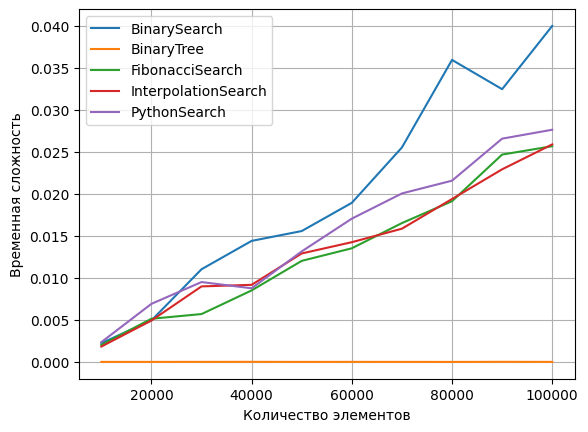

In [ ]:
#общий график - сравнение алгоритмов
plt.xlabel('Количество элементов')
plt.ylabel('Временная сложность')
plt.plot(elems, binary, label ='BinarySearch')
plt.plot(elems, binarytree, label ='BinaryTree')
plt.plot(elems, fibonacci, label ='FibonacciSearch')
plt.plot(elems, interpol, label ='InterpolationSearch')
plt.plot(elems, python, label ='PythonSearch')
plt.grid()
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'BinarySearch O(log n)': [binary[i] for i in range(10)],
                   'BinaryTree O(log(log n))': [binarytree[i] for i in range(10)],
                   'FibonacciSearch O(log n)': [fibonacci[i] for i in range(10)],
                   'InterpolationSearch O(log n)': [interpol[i] for i in range(10)],
                   'PythonSearch O(log n)': [python[i] for i in range(10)]}, index=elems).round(6)

df

,BinarySearch O(log n),BinaryTree O(log(log n)),FibonacciSearch O(log n),InterpolationSearch O(log n),PythonSearch O(log n)
10000,0.002239,0.000012,0.002027,0.001835,0.002359
20000,0.004943,0.000011,0.005142,0.004934,0.006915
30000,0.011031,0.000014,0.005701,0.008992,0.009509
40000,0.014404,0.000017,0.008513,0.009178,0.008766
50000,0.015575,0.000010,0.012029,0.012910,0.013155
60000,0.018934,0.000013,0.013524,0.014250,0.017049
70000,0.025518,0.000011,0.016524,0.015856,0.020050
80000,0.035933,0.000007,0.019124,0.019388,0.021567
90000,0.032450,0.000018,0.024671,0.022918,0.026566
100000,0.039974,0.000012,0.025667,0.025883,0.027625


### Задание 2
### Простое рехэширование

In [ ]:
# при возникновении коллизии, ключ переносится в следующую свободную ячейку, начиная с той, в которой он должен быть помещен
class HashNode:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        
    def get_key(self):
        return self.key

    def get_value(self):
        return self.value

class SimpleHashMap:
    
    def __init__(self, capacity: int):
        self.size = 0
        self.capacity = capacity
        self.buckets = [None] * self.capacity
    
    def _hash_generate(self, key):
        return key % self.capacity

    def insert(self, key, value):
        if self.size != self.capacity:
            self.size += 1
            index = self._hash_generate(key)
            while self.buckets:
                if self.buckets[index] != None: # проверка на коллизию
                    index = (index + 1) % self.capacity
                else: break
            self.buckets[index] = HashNode(index, value) #?
        else:
            print("HashMap is full")
    
    def get(self, key):
        index = _hash_generate(key)
        return self.buckets[index]
    
    def delete(self, key):
        index = _hash_generate(key)
        if self.size:
            self.size -= 1
            self.buckets[index] = None
        else:
            print("HashMap is empty")
        
        
    def print(self):
        for i in range(len(self.buckets)):
            if self.buckets[i] != None:
                print(self.buckets[i].get_key(), self.buckets[i].get_value(), sep=": ")
        print()

In [ ]:
hash_table = SimpleHashMap(6)
hash_table.insert(1, 2)
hash_table.insert(2, 0)
hash_table.insert(4, 4)
hash_table.insert(11, 3) 
hash_table.insert(16, 7) # коллизия с ключом (11 % 6 == 16 % 6)
hash_table.insert(10, 10)
hash_table.print()

hash_table.insert(12, 10)

0: 7
1: 2
2: 0
3: 10
4: 4
5: 3

HashMap is full


### Рехэширование с псевдослучайными числами

In [ ]:
class RandomHashMap:
    
    def __init__(self, capacity: int):
        self.size = 0
        self.capacity = capacity
        self.buckets = [None] * self.capacity
    
    def _random_hash_generate(self, key):
        indexes = [i for i in range(self.capacity)]
        random.shuffle(indexes)
        while self.buckets:
            index = indexes.pop()
            if self.buckets[index] == None: # проверка на коллизию
                return index

    def insert(self, key, value):
        if self.size != self.capacity:
            self.size += 1
            index = self._random_hash_generate(key)
            self.buckets[index] = HashNode(index, value) #?
        else:
            print("HashMap is full")
            
    def delete(self, key):
        if key > self.capacity-1:
            print("key isn't found")
        if self.size:
            self.size -= 1
            self.buckets[key] = None
        else:
            print("HashMap is empty")
            
    def print(self):
        for i in range(len(self.buckets)):
            if self.buckets[i] != None:
                print(f"Key: {self.buckets[i].get_key()}, Value: {self.buckets[i].get_value()}")
        print()

In [ ]:
hash_map = RandomHashMap(6)
hash_map.insert(1, 2)
hash_map.insert(2, 0)
hash_map.insert(4, 4)
hash_map.insert(11, 3) 
hash_map.insert(16, 7)
hash_map.insert(10, 10)
hash_map.print()

hash_map.insert(12, 10)

Key: 0, Value: 4
Key: 1, Value: 2
Key: 2, Value: 7
Key: 3, Value: 3
Key: 4, Value: 10
Key: 5, Value: 0

HashMap is full


### Метод цепочек

In [ ]:
# Метод цепочек - это метод решения коллизий в хэш-таблицах.
# Он основан на создании связанных списков (цепочек) элементов,
# которые имеют одинаковый хэш-код.
# Создаем класс узла списка
class ChainHashNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None
    
    def get_key(self):
        return self.key

    def get_value(self):
        return self.value
    
    def get_next(self):
        return self.next


# Создаем класс хэш-таблицы
class ChainHashMap:
    def __init__(self):
        self.capacity = 10  # начальная емкость таблицы
        self.size = 0  # количество элементов в таблице
        self.buckets = [None] * self.capacity  # создаем пустые списки для каждой ячейки таблицы

    # Метод добавления элемента в таблицу
    def insert(self, key, value):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ уже есть в таблице, обновляем значение
                node.value = value
                return
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = ChainHashNode(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None

    # Метод удаления элемента из таблицы
    def delete(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        prev = None
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, удаляем элемент
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2  # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity  # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = ChainHashNode(node.key, node.value)
                else:
                    new_buckets[index] = ChainHashNode(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets
        
    def print(self):
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                print(f"Key: {node.key}, Value: {node.value}")
                node = node.next


In [ ]:
ht = ChainHashMap()
ht.insert('key1', 'value1')
ht.insert('key2', 'value2')
ht.insert('key3', 'value3')
ht.insert('key4', 'value4')
ht.insert('key5', 1)
ht.insert('key6', 2)
ht.insert('key5', 3)
ht.print()

Key: key5, Value: 3
Key: key1, Value: value1
Key: key3, Value: value3
Key: key6, Value: 2
Key: key4, Value: value4
Key: key2, Value: value2


### Задание 3
Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни один из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки, расположенные по вертикалям, горизонталям и обеим диагоналям

In [ ]:
class Queen:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def attack(self, queen) -> bool:
        return self.x == queen.x or self.y == queen.y or abs(queen.x - self.x) == abs(queen.y - self.y)

    def getCoord(self):
        return (self.x, self.y)


def SolveQueens(boardSize: int, queens: list = None):
    if queens is None:
        queens = [Queen(0, random.randint(0, boardSize - 1))]

    if len(queens) == boardSize:
        res = []
        for queen in queens:
            res.append(queen.getCoord())
        return res
    else:
        row = len(queens)
        candidates = [Queen(row, i) for i in range(boardSize)]
        for candidate in candidates:
            under_attack = False
            for queen in queens:
                if queen.attack(candidate):
                    under_attack = True
                    break
            if not under_attack:
                queens.append(candidate)
                result = SolveQueens(boardSize, queens)
                if result is not None:
                    return result
                queens.pop()
        return None


def Draw(placement):
    boardSize = len(placement)
    for x in range(boardSize):
        for y in range(boardSize):
            if (x, y) in placement:
                print("♛", end="")
            else:
                print("▢", end="")
        print()


Draw(SolveQueens(8))

▢▢▢▢▢▢♛▢
♛▢▢▢▢▢▢▢
▢▢♛▢▢▢▢▢
▢▢▢▢▢▢▢♛
▢▢▢▢▢♛▢▢
▢▢▢♛▢▢▢▢
▢♛▢▢▢▢▢▢
▢▢▢▢♛▢▢▢


## Вывод
В ходе данной лабораторной работы были реализованы методы поиска элемента в массиве и определены зависимости времени исполнения алгоритма от числа элементов массива, построен график и сводная таблица. Были реализованы три вида хэширования. Была решена задача с расстановкой ферзей на шахматной доске. Проект был загружен на Github: https://github.com/murrashovaa/Structures-and-algorithmes